# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import warnings
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_amount=2.56
eth_amount=.9

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
#getting cryptocurrency value in USD
cryptocurrency = lambda url, id_key: requests.get(url).json()["data"][id_key]["quotes"]["USD"]["price"]

In [6]:
# Fetch current BTC price
btc = cryptocurrency(btc_url,"1")
# Fetch current ETH price
eth = cryptocurrency(eth_url,"1027")

# Compute current value of my crpto
current_value_btc=btc*btc_amount
current_value_eth=eth*eth_amount

# Print current crypto wallet balance
print(f"The current value of your {btc_amount} BTC is ${current_value_btc:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${current_value_eth:0.2f}")

The current value of your 2.56 BTC is $51996.16
The current value of your 0.9 ETH is $1391.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-15", tz="America/Chicago").isoformat()
last_year = pd.Timestamp("2021-10-15", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_prices = alpaca.get_bars(tickers,timeframe,start = last_year,end = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_prices[closing_prices['symbol']=='AGG'].drop('symbol', axis=1)
SPY = closing_prices[closing_prices['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
closing_prices = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
closing_prices

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2021-10-18 04:00:00+00:00  114.33  114.5600  114.2500  114.49  5573116   
2021-10-19 04:00:00+00:00  114.37  114.3700  114.1600  114.16  5036701   
2021-10-20 04:00:00+00:00  114.17  114.2900  114.0600  114.08  6092491   
2021-10-21 04:00:00+00:00  114.01  114.0400  113.8400  113.84  5226723   
2021-10-22 04:00:00+00:00  113.97  114.1399  113.8950  114.06  3525700   
...                           ...       ...       ...     ...      ...   
2022-10-10 04:00:00+00:00   95.73   95.7500   95.1536   95.34  4071915   
2022-10-11 04:00:00+00:00   95.63   95.8300   95.2700   95.40  8769515   
2022-10-12 04:00:00+00:00   95.25   95.6100   95.2300   95.48  5631485   
2022-10-13 04:00:00+00:00   94.23   95.4400   94.1800   95.18  6231878   
2022-10-14 04:00:00+00:00   95.63   95.6300   94.6100   94.66  8567937   

                                                        SPY                    \
                          trade_count        vwap      open      high     low   
timestamp                                                                       
2021-10-18 04:00:00+00:00       20505  114.448172  443.9700  447.5500  443.27   
2021-10-19 04:00:00+00:00       14607  114.234474  448.9200  450.7000  448.27   
2021-10-20 04:00:00+00:00       19775  114.158933  451.1300  452.7320  451.01   
2021-10-21 04:00:00+00:00       16186  113.906156  451.7700  453.8290  451.31   
2021-10-22 04:00:00+00:00       14226  114.029752  453.1300  454.6700  451.05   
...                               ...         ...       ...       ...     ...   
2022-10-10 04:00:00+00:00       15588   95.345802  363.9600  364.2100  357.67   
2022-10-11 04:00:00+00:00       24296   95.625885  358.2311  363.0300  355.71   
2022-10-12 04:00:00+00:00       20896   95.404315  358.1700  359.8179  356.30   
2022-10-13 04:00:00+00:00       23778   95.068272  349.2050  367.5100  348.11   
2022-10-14 04:00:00+00:00       22665   94.776094  368.5500  370.2600  356.96   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2021-10-18 04:00:00+00:00  447.19   60874661      380230  446.280869  
2021-10-19 04:00:00+00:00  450.64   46148147      369314  449.830651  
2021-10-20 04:00:00+00:00  452.41   48861693      364534  451.910918  
2021-10-21 04:00:00+00:00  453.59   40711481      310769  452.484897  
2021-10-22 04:00:00+00:00  453.12   57592817      482439  453.039092  
...                           ...        ...         ...         ...  
2022-10-10 04:00:00+00:00  360.02   75459157      593460  360.745547  
2022-10-11 04:00:00+00:00  357.74   91448816      688092  358.717517  
2022-10-12 04:00:00+00:00  356.56   76538522      549606  358.000408  
2022-10-13 04:00:00+00:00  365.97  145171940     1098996  359.798331  
2022-10-14 04:00:00+00:00  357.63  122920585      818595  361.365272  

[251 rows x 14 columns]

In [10]:
# Pick AGG and SPY close prices
#Using lambda to get close prices
close_prices = lambda df: df['close'][-1]
agg_close = close_prices(AGG)
spy_close = close_prices(SPY)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $94.66
Current SPY closing price: $357.63


In [11]:
# Compute the current value of shares
current_value_aag=agg_close*my_agg
current_value_spy=spy_close*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${current_value_spy:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${current_value_aag:0.2f}")

The current value of your 50 SPY shares is $17881.50
The current value of your 200 AGG shares is $18932.00


### Savings Health Analysis

In [12]:
# Set monthly household income
income=12000
# Consolidate financial assets data
shares=current_value_aag+current_value_spy
crypto=current_value_btc+current_value_eth
# Create savings DataFrame
savings=pd.DataFrame(data=[shares,crypto],columns=['amount'],index=['shares', 'crypto'])
# Display savings DataFrame
display(savings)

,amount
shares,36813.500
crypto,53387.731


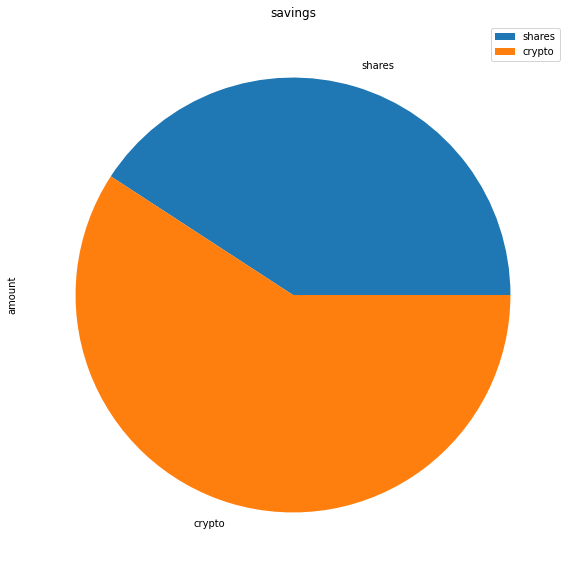

In [13]:
# Plot savings pie chart
savings.plot.pie(title='savings',y='amount', figsize=(15,10));

In [14]:
# Set ideal emergency fund
emergency_fund = income * 3
total_savings=shares+crypto
difference=emergency_fund-total_savings
# Calculate total amount of savings
#Using if and elif conditional statements to calculate if the current saving are sufficient for an emergency fund
if total_savings>emergency_fund:
    print('Congratulations, you have enough monney in your fund!')
elif total_savings==emergency_fund:
    print('Congratulations, you have reached your financial goal!')
elif total_savings<emergency_fund:
    print(f'you are ${difference} away from reaching your financial goal.')

Congratulations, you have enough monney in your fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
agg_spy = alpaca.get_bars(tickers,timeframe,start = start_date,end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_five_year=agg_spy[agg_spy['symbol']=='AGG'].drop('symbol', axis=1)
spy_five_year=agg_spy[agg_spy['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data=pd.concat([agg_five_year, spy_five_year],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCS_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MCS_30.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
warnings.filterwarnings('ignore')
MCS_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982821,1.010454,0.997402,1.007833,0.994511,1.000029,0.994598,1.003941,0.998346,1.001786,...,0.997783,0.996182,1.009475,1.001992,0.997676,0.998631,1.004591,1.003514,0.995692,1.001300
2,0.975752,1.008702,0.994471,1.006318,0.992642,1.012742,0.991078,1.011905,0.994813,1.007264,...,0.995253,1.000459,1.019290,0.994650,0.995050,1.008087,1.013704,1.007603,0.998170,1.006702
3,0.972647,1.009066,0.996067,1.011555,0.994686,1.014322,0.989206,1.020268,0.994392,1.001772,...,1.003161,1.013115,1.017554,0.988618,0.991226,1.011490,1.011470,1.010194,1.006509,1.005319
4,0.976470,1.013183,1.000909,1.009246,0.986133,1.014902,0.996108,1.009504,1.005704,1.000178,...,0.997236,1.018912,1.011166,0.982854,0.995288,1.021814,1.008384,1.016167,1.005811,1.007704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.069678,5.271678,11.199351,6.854285,16.420495,14.970516,4.204725,8.994075,4.684275,9.629423,...,11.902109,8.163203,9.270298,16.002539,2.541890,40.409029,8.313951,6.918336,12.050285,6.017458
7557,6.103128,5.202214,11.213853,6.906341,16.486895,14.850624,4.205852,8.980439,4.714278,9.617760,...,11.959605,8.201230,9.305809,16.058564,2.544337,40.586136,8.262415,6.942933,12.038155,6.037241
7558,6.046139,5.211650,11.246698,6.901259,16.395310,14.683194,4.182235,8.999842,4.746371,9.689908,...,11.962828,8.251387,9.335048,16.157319,2.559455,40.764035,8.317218,6.989588,12.108379,6.052208
7559,6.090507,5.194957,11.298943,6.894235,16.388391,14.632768,4.170012,9.025170,4.704108,9.614581,...,11.950000,8.274511,9.322588,16.048195,2.564194,40.558050,8.279043,6.972583,12.107762,6.014390


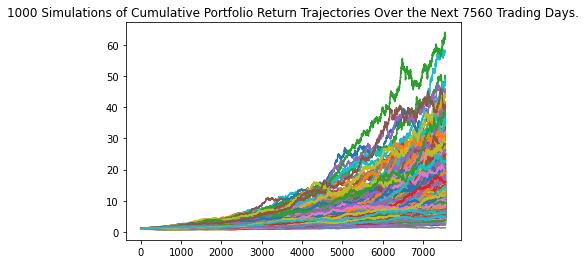

In [20]:
# Plot simulation outcomes
MCS_plot_line = MCS_30.plot_simulation();

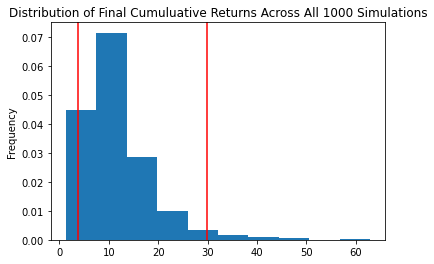

In [21]:
# Plot probability distribution and confidence intervals
MCS_plot_dist = MCS_30.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = MCS_30.summarize_cumulative_return()

# Print summary statistics
print(summ_stats)

count           1000.000000
mean              11.870856
std                7.108596
min                1.281120
25%                7.182168
50%               10.260405
75%               14.381159
max               62.900195
95% CI Lower       3.685949
95% CI Upper      29.938938
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summ_stats[8]*initial_investment,2)
ci_upper = round(summ_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $73718.99 and $598778.77


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summ_stats[8]*initial_investment_2,2)
ci_upper = round(summ_stats[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $110578.48 and $898168.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")